In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
import xgboost
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.shape)

(891, 12)


In [4]:
df.select_dtypes(include=['int64', 'float64']).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# survived_count = df['Survived'].value_counts().get(1, 0)
# survived_count

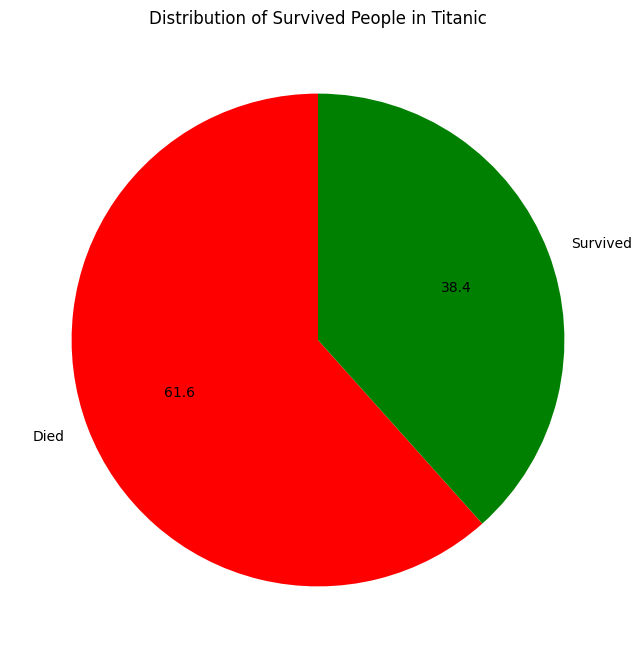

In [11]:
survived=df['Survived'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(survived,labels=['Died','Survived'],autopct='%1.1f',startangle=90,colors=['red','green'])
plt.title('Distribution of Survived People in Titanic')
plt.show()

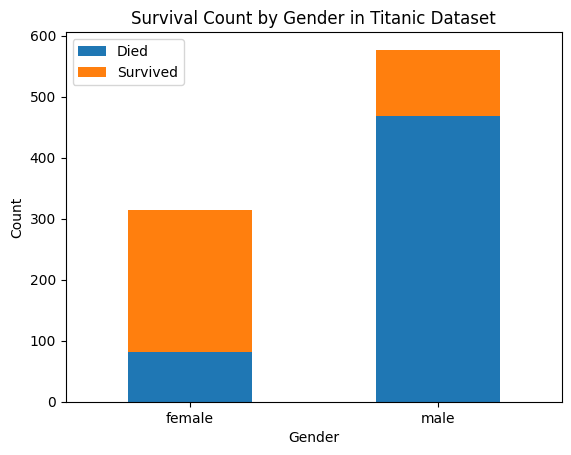

In [8]:
saved_gender = df.groupby(['Sex', 'Survived']).size().unstack()
saved_gender.plot(kind='bar', stacked=True)
plt.title('Survival Count by Gender in Titanic Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])
plt.show()

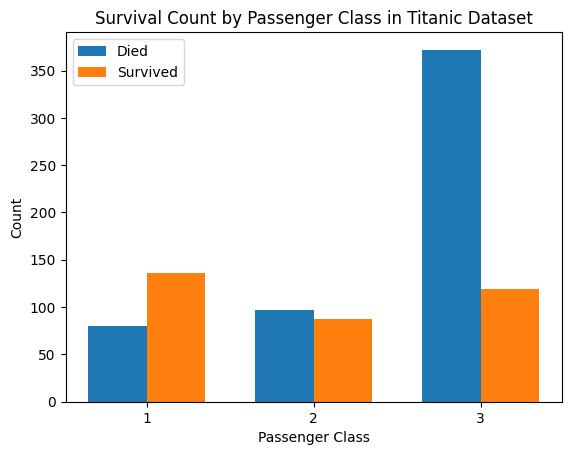

In [14]:
fig, ax = plt.subplots()
bar_width = 0.35
index = range(1, 4)
saved_class = df.groupby(['Pclass', 'Survived']).size().unstack()
saved_class.rename(columns={0: 'Died', 1: 'Survived'}, inplace=True)
bar1 = ax.bar(index, saved_class['Died'], width=bar_width, label='Died')
bar2 = ax.bar([i + bar_width for i in index], saved_class['Survived'], width=bar_width, label='Survived')
ax.set_title('Survival Count by Passenger Class in Titanic Dataset')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(index)
ax.legend()

plt.show()

In [17]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

/tmp/ipykernel_33/3913222735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_33/3913222735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [15]:
df_test=pd.read_csv('/kaggle/input/titanic/train.csv')
df_test.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'].astype(str))
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  


In [18]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
x = df.drop('Survived', axis=1)
y = df['Survived']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

NameError: name 'accuracy_score' is not defined

In [ ]:
df_listing2 = pd.DataFrame((df_listing.isnull().sum())*100/len(df_listing), columns=['Missing Values'])
df_listing2[df_listing2['Missing Values']>0]

In [ ]:
df_listing3 = pd.DataFrame((df_listing.isnull().sum())*100/len(df_listing), columns=['Missing Values'])
df_listing3[df_listing3['Missing Values']>75]

In [ ]:
missings = ['square_feet','license']
for i in missings:
    df_listing= df_listing.drop(columns=[i])

In [ ]:
df_listing2[df_listing2['Missing Values']>20]

In [ ]:
missvalues = ['security_deposit', 'weekly_price', 'cleaning_fee', 'monthly_price', 'price']
for col in missvalues:
    df_listing[col] = df_listing[col].fillna('0')
    df_listing[col] = df_listing[col].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df_listing[missvalues].head()

In [ ]:
numeric_columns = df_listing.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(20,40))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Airbnb Dataset')
plt.show()

In [ ]:
df_listing = df_listing.drop('scrape_id', axis=1)

Name: Ayushi Shah
Topic: Airbnb EDA